<h1> Importing Libraries<\h1>

In [1]:
#impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
import random 
import missingno as msno
import numpy as np

<h1> Reading data<\h1>

<h4> data link :https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset</h4>

In [2]:
# Imorting data and dividing two diffrent data
df = pd.read_csv("BitcoinHeistData.csv")

whole_white_data = df[df['label']=='white']

black_data = df[df['label']!='white']

<h1> Sampling white data<\h1>

In [3]:
# Random selection and down sampling of the white data
whole_white_data.count()
white_data = []
white_data = whole_white_data.iloc[random.sample(range(len(whole_white_data)), 100000)]



<h1> Viewing Data<\h1>

In [4]:
#Previwing both data
print(white_data.head())

print(black_data.head())

                                    address  year  day  length    weight  \
2798736  3HQKoV17yCm2NA9mNj2k3MwMnY5ipSkGX7  2018  213       0  0.035714   
1376313  19Aq5bpQHkz9MyDHCN5mH5eWGHrBroZWzz  2014  250     144  0.260498   
67774    1JaPkMuN6uVG7o5GM7SFet4MTYwFYcAgdj  2011   36       4  0.250000   
1246666  1DL3UTKLaxwPMeuTMp3MffV4wnomiyvymC  2014  120      68  0.171529   
1854333  146A9uHCbV3hDbKGyizfXtR6aHwbWi4vLn  2015  363     144  0.000005   

         count  looped  neighbors        income  label  
2798736      1       0          2  3.000000e+07  white  
1376313   1203       0          2  6.387083e+07  white  
67774        1       0          2  4.348000e+09  white  
1246666     27       0          2  4.702837e+08  white  
1854333   3432    2314          2  2.574601e+08  white  
                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  13

In [5]:
#Overridding  black labels
black_data['label']= 'black'

#print(df1.label.unique())

<ipython-input-5-0b38573e7c78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_data['label']= 'black'


<h1> Joining data<\h1>

In [6]:
#Appending black data to white data
df1 = black_data.append(white_data)

#df1.to_csv('data.csv',index=False)
df1.describe()

,year,day,length,weight,count,looped,neighbors,income
count,141413.000000,141413.000000,141413.000000,1.414130e+05,141413.000000,141413.000000,141413.000000,1.414130e+05
mean,2014.583002,179.132654,43.975731,5.658909e-01,683.571730,197.808313,2.174574,3.473941e+09
std,2.053459,101.417351,58.827358,3.479808e+00,1612.313879,864.411314,14.534126,1.855256e+11
min,2011.000000,1.000000,0.000000,1.825881e-87,1.000000,0.000000,1.000000,3.000000e+07
25%,2013.000000,91.000000,2.000000,3.125000e-02,1.000000,0.000000,1.000000,7.751150e+07
50%,2015.000000,173.000000,8.000000,2.613636e-01,1.000000,0.000000,2.000000,1.752837e+08
75%,2016.000000,268.000000,100.000000,1.000000e+00,48.000000,0.000000,2.000000,6.585439e+08
max,2018.000000,365.000000,144.000000,9.386935e+02,14496.000000,14494.000000,3776.000000,4.996440e+13


In [7]:
#viwing data type of columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141413 entries, 0 to 2323949
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   address    141413 non-null  object 
 1   year       141413 non-null  int64  
 2   day        141413 non-null  int64  
 3   length     141413 non-null  int64  
 4   weight     141413 non-null  float64
 5   count      141413 non-null  int64  
 6   looped     141413 non-null  int64  
 7   neighbors  141413 non-null  int64  
 8   income     141413 non-null  float64
 9   label      141413 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 11.9+ MB


<h1> Modification of data type<\h1>

In [8]:
#Changinging data type 'year','day'and 'label' to category
df1['year'] = df1['year'].astype('category')
df1['day'] = df1['day'].astype('category')
df1['label'] = df1['label'].astype('category')
df1['address'] = df1['address'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141413 entries, 0 to 2323949
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   address    141413 non-null  category
 1   year       141413 non-null  category
 2   day        141413 non-null  category
 3   length     141413 non-null  int64   
 4   weight     141413 non-null  float64 
 5   count      141413 non-null  int64   
 6   looped     141413 non-null  int64   
 7   neighbors  141413 non-null  int64   
 8   income     141413 non-null  float64 
 9   label      141413 non-null  category
dtypes: category(4), float64(2), int64(4)
memory usage: 14.6 MB


<h1> Analysis (EDA) <\h1>

In [9]:
#verifing unique years
df1['year'].unique()

[2017, 2016, 2013, 2014, 2015, 2012, 2011, 2018]
Categories (8, int64): [2017, 2016, 2013, 2014, 2015, 2012, 2011, 2018]

In [10]:
#verifing uniqe days
df1['day'].unique()

[11, 132, 246, 322, 238, ..., 129, 42, 15, 16, 365]
Length: 365
Categories (365, int64): [11, 132, 246, 322, ..., 42, 15, 16, 365]

In [11]:
#Checking for duplicates
duplicates = df1.duplicated()

df1[duplicates]


,address,year,day,length,weight,count,looped,neighbors,income,label


In [12]:
#Checking yearly distribution of the data 
df1.groupby('year').count()

,address,day,length,weight,count,looped,neighbors,income,label
year,,,,,,,,,
2011,12451,12451,12451,12451,12451,12451,12451,12451,12451
2012,13475,13475,13475,13475,13475,13475,13475,13475,13475
2013,20280,20280,20280,20280,20280,20280,20280,20280,20280
2014,23037,23037,23037,23037,23037,23037,23037,23037,23037
2015,16447,16447,16447,16447,16447,16447,16447,16447,16447
2016,28143,28143,28143,28143,28143,28143,28143,28143,28143
2017,16026,16026,16026,16026,16026,16026,16026,16026,16026
2018,11554,11554,11554,11554,11554,11554,11554,11554,11554


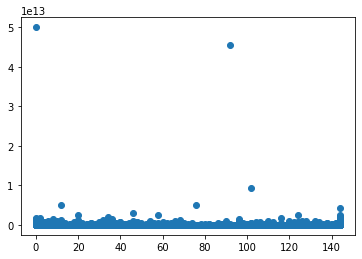

In [13]:
#Visulaising length vs income of data

plt.scatter(x='length' , y = 'income' , data = df1)
plt.show()

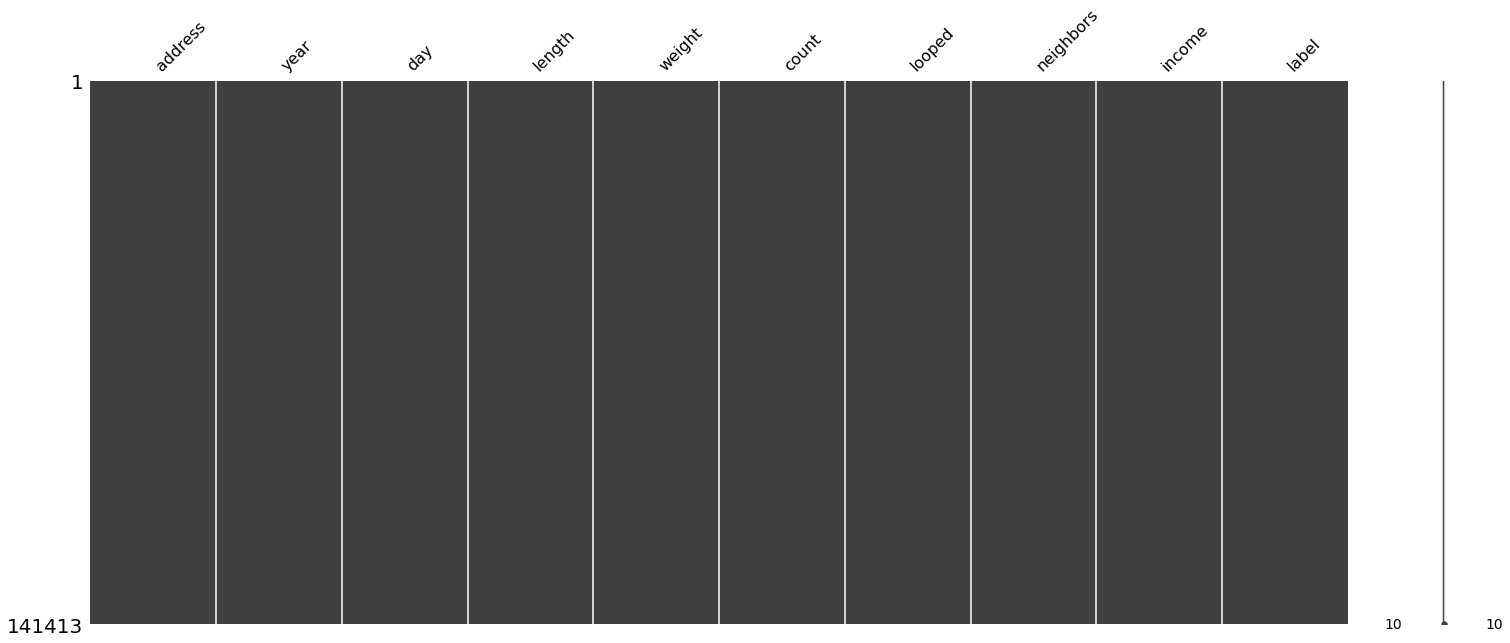

In [14]:
#verifing missing number
msno.matrix(df1)
plt.show()

In [15]:
#duplicate address checking (transactaion from same address)
duplicates1 = df1.duplicated(subset=['address'],keep=False)

df1[duplicates1].groupby('address').count()


,year,day,length,weight,count,looped,neighbors,income,label
address,,,,,,,,,
111111mg3JxXdXbypYNyERcYLaJdzEwb,0,0,0,0,0,0,0,0,0
111213xkVmeHT1v7N7Ff43XmVfLAUq7WEZ,0,0,0,0,0,0,0,0,0
111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,0,0,0,0,0,0,0,0,0
111khWGs3Mj7UgKT7aS6hLsYK11ii4Gmw,0,0,0,0,0,0,0,0,0
111rk7dfDvQLx5FtywePeNzvDVGTJhKrz,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3R1t6aA3jcZDLJoDGbpzGeC9kPBxtGRL5Y,0,0,0,0,0,0,0,0,0
3R2HAuLQ1g54AvPLwrSfeqrbBxLdV3eazT,0,0,0,0,0,0,0,0,0
3R2HSBANKvhNv1wh8Tp4DBaJLZNkGuqZJC,0,0,0,0,0,0,0,0,0


In [16]:
#duplicate address (transaction on same year)

duplicates2 = df1.duplicated(subset=['address','year'],keep=False)

dup_df1 = df1[duplicates2].groupby(['address','year']).count()

dup_df1

day  length  weight  count  looped  \
address                            year                                       
111111mg3JxXdXbypYNyERcYLaJdzEwb   2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
...                                      ...     ...     ...    ...     ...   
3R2WaJK4wfkTgVyoFWfws9cuU46FmoiCc8 2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  NaN     NaN     NaN    NaN     NaN   
                                   2018  NaN     NaN     NaN    NaN     NaN   

                                         neighbors  income  label  
address                            year                            
111111mg3JxXdXbypYNyERcYLaJdzEwb   2011        NaN     NaN    NaN  
                                   2012        NaN     NaN    NaN  
                                   2013        NaN     NaN    NaN  
                                   2014        NaN     NaN    NaN  
                                   2015        NaN     NaN    NaN  
...                                            ...     ...    ...  
3R2WaJK4wfkTgVyoFWfws9cuU46FmoiCc8 2014        NaN     NaN    NaN  
                                   2015        NaN     NaN    NaN  
                                   2016        NaN     NaN    NaN  
                                   2017        NaN     NaN    NaN  
                                   2018        NaN     NaN    NaN  

[955336 rows x 8 columns]

In [17]:
#removing NAN value
#dup_df1.agg(lambda x: np.nan if x.isnull().all() else x.dropna())
dup_df1.dropna()

,,day,length,weight,count,looped,neighbors,income,label
address,year,,,,,,,,
112wED5uHhY1aiSaWAzgeMDaCKFcCvj9Pn,2016,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1138hthSBoPJojZtaoYnXJJddJruaNQt8X,2011,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
113JHb4ZVYtLD8cbwr7gLcuFqU36SmghS8,2012,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
113i99LGHX2ZzBed1SaMpnqb6ruRgbBwMc,2014,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1148zc3Jf2ZYCB9KpgD4s8nXJBa6jQsT1M,2014,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
3NGUiG22aAq2NnTe9ntVsheYJZ4yFVP6WC,2018,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3Pei4hHgGpXQAJFremyy3yNREcLzvBvh4E,2017,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3QbN8U4dfCxwtXAcgWTkqwGtP1PcaZ2sgv,2017,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [18]:
#duplicate address (transaction on same day)

duplicates3 = df1.duplicated(subset=['address','year','day'],keep=False)

df1[duplicates3]

,address,year,day,length,weight,count,looped,neighbors,income,label


<h1> Visualization<\h1>

In [19]:
#importing plotting libraries
import seaborn as sns

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141413 entries, 0 to 2323949
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   address    141413 non-null  category
 1   year       141413 non-null  category
 2   day        141413 non-null  category
 3   length     141413 non-null  int64   
 4   weight     141413 non-null  float64 
 5   count      141413 non-null  int64   
 6   looped     141413 non-null  int64   
 7   neighbors  141413 non-null  int64   
 8   income     141413 non-null  float64 
 9   label      141413 non-null  category
dtypes: category(4), float64(2), int64(4)
memory usage: 14.6 MB


In [21]:
#sns.pairplot(df1)
#plt.show()

In [22]:
df1.corr()

,length,weight,count,looped,neighbors,income
length,1.000000,0.002227,0.709169,0.386475,0.034509,0.002060
weight,0.002227,1.000000,0.010867,0.047420,0.514698,0.027862
count,0.709169,0.010867,1.000000,0.530850,0.023226,-0.002677
looped,0.386475,0.047420,0.530850,1.000000,0.054238,0.001277
neighbors,0.034509,0.514698,0.023226,0.054238,1.000000,0.034077
income,0.002060,0.027862,-0.002677,0.001277,0.034077,1.000000


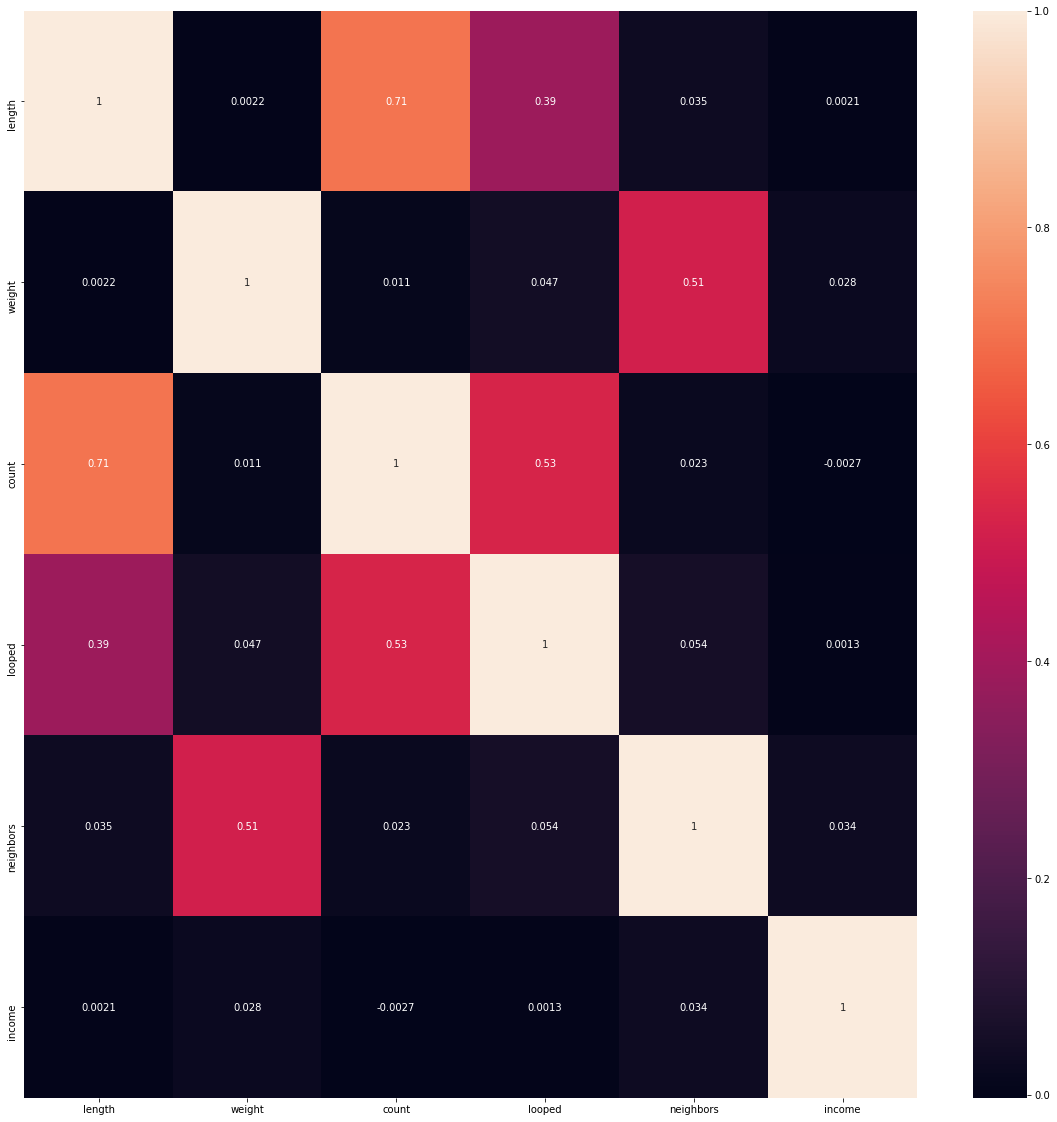

<Figure size 432x288 with 0 Axes>

In [23]:
_=plt.figure(figsize=(20,20))
_=sns.heatmap(df1.corr(),annot=True)
plt.show()
plt.savefig("ransomware_heatmap.jpg")

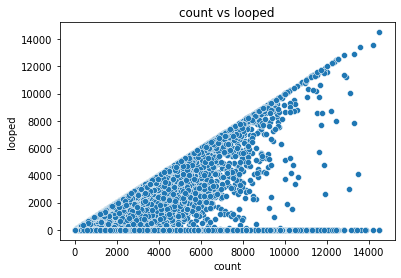

In [24]:
sns.scatterplot(x='count',y='looped',data = df1)
plt.xlabel('count')
plt.ylabel('looped')
plt.title('count vs looped')
plt.show()

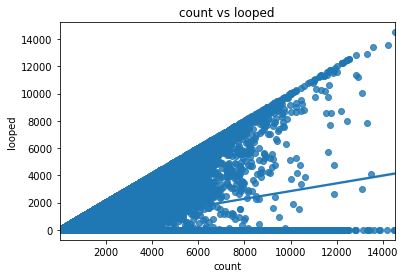

In [25]:
sns.regplot (x='count',y='looped',data = df1)
plt.xlabel('count')
plt.ylabel('looped')
plt.title('count vs looped')
plt.show()

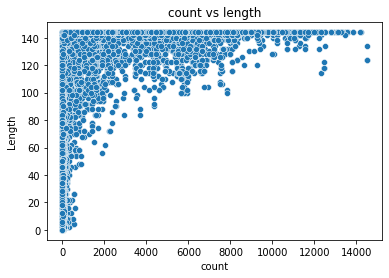

In [26]:
sns.scatterplot(x='count',y='length',data = df1)
plt.xlabel('count')
plt.ylabel('Length')
plt.title('count vs length')
plt.show()

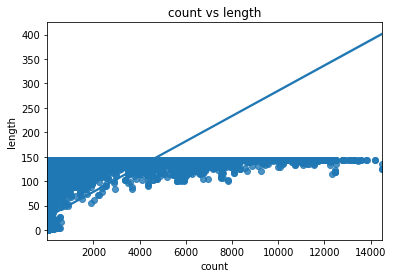

In [27]:
sns.regplot (x='count',y='length',data = df1)
plt.xlabel('count')
plt.ylabel('length')
plt.title('count vs length')
plt.show()

<Figure size 2880x1440 with 0 Axes>

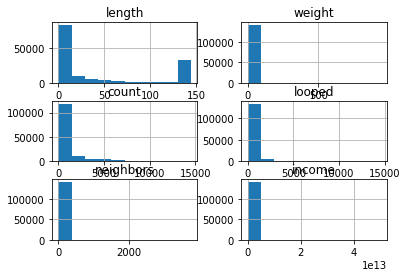

In [28]:
_=plt.figure(figsize=(40,20))
_=df1.hist()
plt.show()

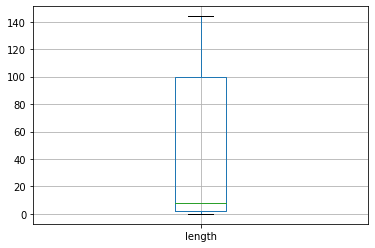

In [29]:
df1[['length']].boxplot()
plt.show()

<h1> Feature Engineering and Modeling using pipeline <\h1>

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import time

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141413 entries, 0 to 2323949
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   address    141413 non-null  category
 1   year       141413 non-null  category
 2   day        141413 non-null  category
 3   length     141413 non-null  int64   
 4   weight     141413 non-null  float64 
 5   count      141413 non-null  int64   
 6   looped     141413 non-null  int64   
 7   neighbors  141413 non-null  int64   
 8   income     141413 non-null  float64 
 9   label      141413 non-null  category
dtypes: category(4), float64(2), int64(4)
memory usage: 14.6 MB


<h2> Transformig data manually<\h2>

In [32]:
X = df1.iloc[:,:-1]
y = df1['label']

numeric_features = ['length', 'weight','count','looped','neighbors','income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['address', 'year', 'day']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])




<h2> Base logistic Regression using pipeline for feature engineering : Model Score : 87.7% ,Overall time : 11.3 Sec<\h2>

In [181]:
lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=150))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

start=time.time()

lr_clf.fit(X_train, y_train)

print("model score: %.3f" % lr_clf.score(X_test, y_test))

end = time.time()

print("Over all time taken : ", end-start)

model score: 0.877
Over all time taken :  11.357649564743042


<h2> Hyperparameter tuning of logistic Regression using Gridsearch and  pipeline for feature engineering : Best Model Score : 89.4% Training time: 1Hr 17 min<\h2>

In [183]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__max_iter': [150,200,500,650,]
}
start = time.time()

lr_grid_clf = GridSearchCV(lr_clf, param_grid, cv=10)
lr_grid_clf.fit(X_train, y_train)

print(("best logistic regression from grid search: %.3f" % lr_grid_clf.score(X_test, y_test)))

end = time.time()

print("Training time taken : ", end-start)

best logistic regression from grid search: 0.894
Training time taken :  4674.489832162857


<h2> Best logistic Regression Model Scores and confusion matrix<\h2>

In [184]:
start = time.time()

y_pred = lr_grid_clf.predict(X_test)

end = time.time()

print("Predicting time taken : ", end-start)

Predicting time taken :  0.9030518531799316


In [185]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,pos_label='white')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,pos_label='white')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,pos_label='white')))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8938451094642756
Precision Score : 0.9160480391775817
Recall Score : 0.936690247198156
F1 Score : 0.926254151028669
Confusion Matrix : 
[[ 8032  2160]
 [ 1593 23569]]


<h2> Best logistic Regression Model's hyper parametrs<\h2>

In [52]:
lr_grid_clf.best_params_

{'classifier__C': 100,
 'classifier__max_iter': 500,
 'preprocessor__num__imputer__strategy': 'mean'}

<h2> Top 10 logistic Regression Model with Scores and hyperparameter<\h2>

In [53]:
lr_grid_clf_results = pd.DataFrame.from_dict(lr_grid_clf.cv_results_,orient='index').transpose().sort_values(['rank_test_score'])

lr_grid_clf_results[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__max_iter,param_preprocessor__num__imputer__strategy,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
23,20.0071,0.891928,0.735342,0.0164937,100,500,median,"{'classifier__C': 100, 'classifier__max_iter':...",0.894211,0.892042,...,0.889779,0.890345,0.893079,0.891194,0.892325,0.891005,0.887977,0.891475,0.00171857,1
22,19.0902,0.215028,0.771144,0.0182901,100,500,mean,"{'classifier__C': 100, 'classifier__max_iter':...",0.894211,0.892042,...,0.889779,0.890345,0.893079,0.891194,0.892325,0.891005,0.887977,0.891475,0.00171857,1
21,9.11492,0.129242,0.772944,0.013413,100,200,median,"{'classifier__C': 100, 'classifier__max_iter':...",0.891854,0.888459,...,0.889591,0.890722,0.891571,0.892231,0.895437,0.891759,0.890146,0.891447,0.00181587,3
20,9.00702,0.120666,0.761744,0.00839158,100,200,mean,"{'classifier__C': 100, 'classifier__max_iter':...",0.891854,0.888459,...,0.889591,0.890722,0.891571,0.892231,0.895437,0.891759,0.890146,0.891447,0.00181587,3
17,19.21,0.181056,0.763144,0.0132103,10,500,median,"{'classifier__C': 10, 'classifier__max_iter': ...",0.892042,0.889779,...,0.889025,0.888931,0.891288,0.888365,0.892137,0.890251,0.887317,0.890071,0.00157756,5
16,19.1232,0.158518,0.753343,0.00462734,10,500,mean,"{'classifier__C': 10, 'classifier__max_iter': ...",0.892042,0.889779,...,0.889025,0.888931,0.891288,0.888365,0.892137,0.890251,0.887317,0.890071,0.00157756,5
15,9.20563,0.293433,0.750243,0.0115574,10,200,median,"{'classifier__C': 10, 'classifier__max_iter': ...",0.891005,0.891477,...,0.889591,0.888554,0.891571,0.885442,0.889779,0.890439,0.887694,0.889609,0.00181661,7
14,9.71246,0.488718,0.807246,0.0698335,10,200,mean,"{'classifier__C': 10, 'classifier__max_iter': ...",0.891005,0.891477,...,0.889591,0.888554,0.891571,0.885442,0.889779,0.890439,0.887694,0.889609,0.00181661,7
19,5.73903,0.0730125,0.770344,0.0150677,100,100,median,"{'classifier__C': 100, 'classifier__max_iter':...",0.890628,0.888177,...,0.886385,0.891194,0.891571,0.886291,0.888459,0.886574,0.884111,0.888373,0.00238516,9
18,5.83523,0.294218,0.782745,0.0560408,100,100,mean,"{'classifier__C': 100, 'classifier__max_iter':...",0.890628,0.888177,...,0.886385,0.891194,0.891571,0.886291,0.888459,0.886574,0.884111,0.888373,0.00238516,9


<h2>Base Random Forest classifier with pipeline for feature engineering : accuracy score :91.5 time taken:21 min <\h2>

In [55]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
clf = RandomForestClassifier()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
start = time.time()

rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf)))

end = time.time()

print("Overall time taken : ", end-start)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Accuracy Score : 0.9156531085591446
Overall time taken :  1286.8735539913177


<h2>Hyper-parameter tuning for random forest classifier <\h2>

In [56]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#max_depth = [5, 8, 15, 25, 30]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# 
# Create the random grid
random_grid = {
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap,
               'preprocessor__num__imputer__strategy': ['mean', 'median']}
pprint(random_grid)




{'classifier__bootstrap': [True, False],
 'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'classifier__max_features': ['auto', 'sqrt'],
 'classifier__min_samples_leaf': [1, 2, 4],
 'classifier__min_samples_split': [2, 5, 10],
 'preprocessor__num__imputer__strategy': ['mean', 'median']}


<h2>Random Forest classifier with Auto transformation of columns using random search with prameter grid and pipeline for feature engineering : accuracy score : 92% Training time :1 Hr 47 Min <\h2>

In [49]:
# Use the random grid to search for best hyperparameters

from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import RandomizedSearchCV


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))])


rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

strat = time.time()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_rs_clf = RandomizedSearchCV(rf_clf,param_distributions=random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_rs_clf.fit(X_train, y_train)

end = time.time()

print("Training time taken : ", end-start)

NameError: name 'random_grid' is not defined

<h2>Best Random Forest classifier scores and confusion matrix <\h2>

In [58]:
start=time.time()

y_pred_rf2 = rf_rs_clf.predict(X_test)

end = time.time()

print("Prediction time taken : ", end-start)

print(("best Random Forest Classifier from grid search: %.3f" % rf_rs_clf.score(X_test, y_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf2)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf2)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf2,pos_label='white')))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf2,pos_label='white')))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf2,pos_label='white')))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_rf2)))


Prediction time taken :  11.82067608833313
best Random Forest Classifier from grid search: 0.920
Accuracy Score : 0.9199241952820049
Accuracy Score : 0.9199241952820049
Precision Score : 0.9423545872476514
Recall Score : 0.944355420238763
F1 Score : 0.9433539428136943
Confusion Matrix : 
[[ 8950  1442]
 [ 1389 23573]]


<h2>Best Random Forest classifier parameters <\h2>

In [59]:
pd.DataFrame([rf_rs_clf.best_params_])

,preprocessor__num__imputer__strategy,classifier__min_samples_split,classifier__min_samples_leaf,classifier__max_features,classifier__max_depth,classifier__bootstrap
0,median,5,1,sqrt,None,False


<h2>Top 10 Random Forest classifier scores and ranking <\h2>

In [60]:
results_df=pd.DataFrame.from_dict(rf_random.cv_results_,orient='index').transpose()

results_df.sort_values(['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num__imputer__strategy,param_classifier__min_samples_split,param_classifier__min_samples_leaf,param_classifier__max_features,param_classifier__max_depth,param_classifier__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,1074.68,11.8561,15.3299,0.651642,median,5,1,sqrt,None,False,{'preprocessor__num__imputer__strategy': 'medi...,0.915566,0.914095,0.910531,0.913397,0.00211388,1
57,698.744,4.22704,14.4862,0.315598,mean,5,1,sqrt,None,True,{'preprocessor__num__imputer__strategy': 'mean...,0.90923,0.908438,0.906118,0.907929,0.00132029,2
36,233.321,2.36551,4.51159,0.0437772,median,2,1,sqrt,110,False,{'preprocessor__num__imputer__strategy': 'medi...,0.775521,0.773032,0.777784,0.775446,0.00194076,3
69,126.357,1.49996,4.60126,0.052659,mean,10,1,auto,110,False,{'preprocessor__num__imputer__strategy': 'mean...,0.77142,0.773343,0.774305,0.773023,0.00119949,4
33,128.68,2.07131,4.45425,0.0452648,median,5,1,auto,110,True,{'preprocessor__num__imputer__strategy': 'medi...,0.772155,0.775267,0.766639,0.771354,0.00356737,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,11.2893,0.203777,2.25113,0.00616477,mean,10,4,sqrt,70,True,{'preprocessor__num__imputer__strategy': 'mean...,0.707521,0.707521,0.707493,0.707512,1.33342e-05,54
66,14.3775,0.375349,2.73882,0.0902283,median,2,4,sqrt,None,False,{'preprocessor__num__imputer__strategy': 'medi...,0.707521,0.707521,0.707493,0.707512,1.33342e-05,54
67,13.3834,0.27975,2.71582,0.0912279,median,5,4,auto,50,False,{'preprocessor__num__imputer__strategy': 'medi...,0.707521,0.707521,0.707493,0.707512,1.33342e-05,54
98,9.80323,0.578948,2.09079,0.0319843,median,2,4,auto,20,True,{'preprocessor__num__imputer__strategy': 'medi...,0.707521,0.707521,0.707493,0.707512,1.33342e-05,54


<h2> Random Forest with removed corellated column<\h2>

In [89]:
from sklearn.compose import make_column_selector as selector

X1 = df1.drop(['label','count'],axis=1)
y1 = df1['label']

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))])


"""
numeric_features = ['length', 'weight','looped','neighbors','income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['address', 'year', 'day']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
"""
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)




In [100]:
from bayes_opt import BayesianOptimization
from catboost import CatBoostClassifier, cv, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

def rf_eval(min_samples_leaf,max_depth, n_estimators,min_samples_split):
    params = {
            "min_samples_leaf" : int(min_samples_leaf),
            "classifier__max_depth" : int(max_depth),
            "classifier__verbose" : 0,
            'classifier__max_features': ['auto', 'log2'],
            'classifier__min_samples_leaf': int(min_samples_leaf),
            'classifier__bootstrap': [True,False],
            'classifier__n_estimators': int(n_estimators),
            'preprocessor__num__imputer__strategy': ['mean', 'median']}
    
    rf_clf1 = Pipeline(steps=[('preprocessor', preprocessor),('classifier', )])
    score = cross_val_score(rf_clf1, X_train, y_train,fit_params =params,cv=5).mean()
    
    print( rf_clf1)
    return score



In [114]:
params = {
            
            'classifier__max_depth' : 5,
            'classifier__verbose' : 0,
            'classifier__max_features': ['auto', 'log2'],
            'classifier__min_samples_leaf': 6,
            'classifier__bootstrap': [True,False],
            'classifier__n_estimators': 10,}
           # 'preprocessor__num__imputer__strategy': ['mean', 'median']}
    
rf_clf1 = Pipeline(steps=[('preprocessor', preprocessor),('classifier',RandomForestClassifier() )])
score = cross_val_score(rf_clf1, X_train, y_train,fit_params=params,cv=3).mean()
print(score)

e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\python3.8\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
TypeError: fit() got an unexpected keyword argument 'max_depth'

  warnings.warn("Estimator fit failed. The score on this train-test"
e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py", line 531,

nan


e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\python3.8\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
TypeError: fit() got an unexpected keyword argument 'max_depth'

  warnings.warn("Estimator fit failed. The score on this train-test"


In [101]:
strat = time.time()

rfBO = BayesianOptimization(rf_eval, {'min_samples_leaf': (2, 15),
                                        'n_estimators':(100,2000),
                                        'max_depth': (5, 63),
                                        'min_samples_split':(2,20)
                                        })

rfBO.maximize(n_iter=10, init_points=2)

end = time.time()

print("Training time taken : ", end-start)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------


e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\python3.8\lib\site-packages\bayes_opt\target_space.py", line 191, in probe
    target = self._cache[_hashable(x)]
KeyError: (44.41712705222096, 11.578557361898346, 13.390406042464019, 1246.9042326885165)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\python3.8\lib\site-packages\sklearn\pipeline.py", line 329, in fit
    fit_params_steps = self._check_fit_params(**fit_params)
  File "e:\python3.8\lib\site-packages\sklearn\pipeline.py", line 243, in _check_fit_params
    raise ValueError(
ValueError: Pipeline.fit does 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000000061655A60>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                

e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\python3.8\lib\site-packages\bayes_opt\target_space.py", line 191, in probe
    target = self._cache[_hashable(x)]
KeyError: (20.437711247196344, 3.892900478610024, 16.6004434793827, 714.0447543623977)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "e:\python3.8\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\python3.8\lib\site-packages\sklearn\pipeline.py", line 329, in fit
    fit_params_steps = self._check_fit_params(**fit_params)
  File "e:\python3.8\lib\site-packages\sklearn\pipeline.py", line 243, in _check_fit_params
    raise ValueError(
ValueError: Pipeline.fit does not

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000000061655A60>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [96]:
start=time.time()
#res = rf_eval(4,3, 2,2)

#print(res)

"""min_samples_leaf = 4,
                                max_depth = 3,
                                verbose = 0,
                                max_features = 'auto',
                                bootstrap = True,
                                n_estimators= 4"""

rf = RandomForestClassifier(min_samples_leaf = 4,
                            max_depth = 3,
                            verbose = -1,
                            max_features = 'auto',
                            bootstrap = True,
                            n_estimators= 4)
    
rf_clf1 = Pipeline(steps=[('preprocessor', preprocessor),('classifier',rf )])
   # score = cross_val_score(rf_clf1, X_train, y_train,fit_params =params,cv=5).mean()
rf_clf1.fit(X_train, y_train)

end = time.time()

print("trainng time taken : ", end-start)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ZeroDivisionError: integer division or modulo by zero

In [94]:
pd.DataFrame([rf_clf1.get_params()])
pd.DataFrame([rf.get_params()])


,bootstrap,ccp_alpha,class_weight,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
0,True,0.0,None,gini,3,auto,None,None,0.0,None,4,2,0.0,4,None,False,None,0,False


In [95]:
start=time.time()

y_pred_rf3 = rf_clf1.predict(X_test)

end = time.time()

print("Prediction time taken : ", end-start)

print(("best Random Forest Classifier from grid search: %.3f" % rf_clf1.score(X_test, y_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf3)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf3)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf3,pos_label='white')))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf3,pos_label='white')))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf3,pos_label='white')))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_rf3)))

Prediction time taken :  0.9280531406402588
best Random Forest Classifier from grid search: 0.705
Accuracy Score : 0.7054081574927873
Accuracy Score : 0.7054081574927873
Precision Score : 0.7054081574927873
Recall Score : 1.0
F1 Score : 0.8272602126283317
Confusion Matrix : 
[[    0 10415]
 [    0 24939]]


In [ ]:
strat = time.time()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_rs_clf2 = RandomizedSearchCV(rf_clf2,param_distributions=random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_rs_clf2.fit(X_train, y_train)

end = time.time()

print("Training time taken : ", end-start)

In [ ]:
rfBO.max

In [52]:
#Bayesian optimization
def bayesian_optimization(dataset, function, parameters):
    X_train, y_train, X_test, y_test = dataset
    n_iterations = 5
    gp_params = {"alpha": 1e-4}

    BO = BayesianOptimization(function, parameters)
    BO.maximize(n_iter=n_iterations, **gp_params)

    return BO.max

In [53]:
def rfc_optimization(cv_splits):
    def function(n_estimators, max_depth, min_samples_split):
        return cross_val_score(
               RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   n_jobs=-1, 
                   random_state=42,   
                   class_weight="balanced"),  
               X=X_train, 
               y=y_train, 
               cv=cv_splits,
               scoring="roc_auc",
               n_jobs=-1).mean()

    parameters = {"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10)}
    
    return function, parameters

In [54]:
def xgb_optimization(cv_splits, eval_set):
    def function(eta, gamma, max_depth):
            return cross_val_score(
                   xgb.XGBClassifier(
                       objective="binary:logistic",
                       learning_rate=max(eta, 0),
                       gamma=max(gamma, 0),
                       max_depth=int(max_depth),                                               
                       seed=42,
                       nthread=-1,
                       scale_pos_weight = len(y_train[y_train == 0])/
                                          len(y_train[y_train == 1])),  
                   X=X_train, 
                   y=y_train, 
                   cv=cv_splits,
                   scoring="roc_auc",
                   fit_params={
                        "early_stopping_rounds": 10, 
                        "eval_metric": "auc", 
                        "eval_set": eval_set},
                   n_jobs=-1).mean()

    parameters = {"eta": (0.001, 0.4),
                  "gamma": (0, 20),
                  "max_depth": (1, 2000)}
    
    return function, parameters

In [55]:
#Train model
def train(X_train, y_train, X_test, y_test, function, parameters):
    dataset = (X_train, y_train, X_test, y_test)
    cv_splits = 4
    
    best_solution = bayesian_optimization(dataset, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")

    model.fit(X_train, y_train)
    
    return model

In [63]:
func,param = rfc_optimization(5)

#print(func())
train(X_train, y_train, X_test, y_test,func,param)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  nan      |  49.22    |  5.752    |  797.3    |
|  2        |  nan      |  113.9    |  7.141    |  224.9    |
|  3        |  nan      |  106.4    |  7.17     |  945.5    |
|  4        |  nan      |  49.83    |  5.813    |  983.0    |
|  5        |  nan      |  144.3    |  6.827    |  213.6    |


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<h2>Base light GBM Classifier with default parameter : accuracy : 91.5%, Overall time taken : 7.8 sec<\h2>

In [67]:
import lightgbm as lgb

gbm_clf = lgb.LGBMClassifier()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gbm_clf.get_params())

lgb_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', lgb.LGBMClassifier())])

start = time.time()

# Fit the lgb model
lgb_clf.fit(X_train, y_train)

y_pred_lgb = lgb_clf.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf)))

end = time.time()

print("Overall time taken : ", end-start)

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}
Accuracy Score : 0.9156531085591446
Overall time taken :  7.811446905136108


<h2> Importing libraries and setting up functions fo Opmtimising LGB classifier<\h2>

In [37]:
from sklearn.model_selection import cross_val_score 
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

In [90]:
 def objective_function(params):
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', lgb.LGBMClassifier())])
        #clf = lgb.LGBMClassifier(**params)
        score = cross_val_score(clf, X_train, y_train, cv=5).mean()
        return {'loss': -score, 'status': STATUS_OK}

In [91]:
# Define the search space
space = {
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    'boosting_type': hp.choice('boosting_type', 
                               [{'boosting_type': 'gbdt', 
                                    'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                 {'boosting_type': 'dart', 
                                     'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                 {'boosting_type': 'goss'}]),
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0)
}

In [93]:
import warnings
warnings.filterwarnings("ignore")

<h2>light GBM Classifier with bayesian search and given parameter : accuracy : 90.3%, Overall time taken : 14.5 hrs<\h2>

In [97]:
MAX_EVALS = 500

trials = Trials()
start = time.time()

# Optimize
best = fmin(objective_function,space, algo = tpe.suggest, 
            max_evals = MAX_EVALS,trials = trials)

print("Best: {}".format(best))

end = time.time()

print("Training time taken : ", end-start)


100%|█| 500/500 [14:19:03<00:00, 103.09s/trial, best loss: -0.8866857391222108]
Best: {'boosting_type': 1, 'class_weight': 0, 'colsample_by_tree': 0.9699260257148064, 'dart_subsample': 0.6267208845740517, 'learning_rate': 0.19084772191022098, 'min_child_samples': 35.0, 'num_leaves': 98.0, 'reg_alpha': 0.34030667965715844, 'reg_lambda': 0.5695125674609167, 'subsample_for_bin': 200000.0}
Training time taken :  51543.68098568916


<h2>Optimised light GBM Classifier with best parameter: time traken = 23.1 sec <\h2>

In [173]:
best_model =lgb.LGBMClassifier(boosting_type= 'dart', 
              colsample_bytree= 0.9699260257148064, 
              subsample= 0.6267208845740517, 
              learning_rate= 0.19084772191022098, 
              min_child_samples= 35, 
              num_leaves= 98, 
              reg_alpha= 0.34030667965715844, 
              reg_lambda= 0.5695125674609167, 
              subsample_for_bin= 200000)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', best_model)])
start=time.time()

clf.fit(X_train,y_train)

y_pred_lgb=clf.predict(X_test)

end = time.time()

print("Overall time taken : ", end-start)


Overall time taken :  23.17132544517517


<h2>Optimised light GBM Classifier accuracy score and cunfusion matrix <\h2>

In [151]:
start=time.time()

y_pred_lgb=clf.predict(X_test)

end = time.time()

print("Prediction time taken : ", end-start)

print(("Best LGB Classifier from bayesian search with given parameteer: %.3f" % clf.score(X_test, y_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_lgb)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_lgb)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_lgb,pos_label='white')))
print('Recall Score : ' + str(recall_score(y_test,y_pred_lgb,pos_label='white')))
print('F1 Score : ' + str(f1_score(y_test,y_pred_lgb,pos_label='white')))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_lgb)))

Prediction time taken :  1.4700839519500732
best LGB Classifier from grid search: 0.904
Accuracy Score : 0.9035186966114159
Accuracy Score : 0.9035186966114159
Precision Score : 0.9211976703279522
Recall Score : 0.9441150548834228
F1 Score : 0.9325155801760807
Confusion Matrix : 
[[ 8376  2016]
 [ 1395 23567]]


<h1>Conclusion <\h1>

<h3> Best model has been accuried using the random searh on random forest clasifer with 92% accuracy with below parameters<\h3>

In [176]:
pd.DataFrame([rf_rs_clf.best_params_])

,preprocessor__num__imputer__strategy,classifier__min_samples_split,classifier__min_samples_leaf,classifier__max_features,classifier__max_depth,classifier__bootstrap
0,median,5,1,sqrt,None,False


In [38]:
!pip install bayes_opt

ERROR: Could not find a version that satisfies the requirement bayes_opt
ERROR: No matching distribution found for bayes_opt
You should consider upgrading via the 'e:\python3.8\python.exe -m pip install --upgrade pip' command.
